<a href="https://colab.research.google.com/github/ak283/Online-cab-booking/blob/main/Predicting_Cab_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from geopy import distance

## Importing Data

In [9]:
df = pd.read_csv('/content/drive/MyDrive/csv/training.csv')

In [10]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [11]:
df.shape

(43431, 20)

In [12]:
df['to_city_id'].value_counts()

to_city_id
32.0     475
55.0     174
29.0     116
146.0     89
108.0     64
        ... 
88.0       1
169.0      1
139.0      1
137.0      1
50.0       1
Name: count, Length: 116, dtype: int64

In [13]:
data = df.drop(['Car_Cancellation', 'Cost_of_error'], axis=1)
target = df[['Car_Cancellation']]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  to_date              25541 non-null  float64
 11  online_booking       43431 non-null  int64  
 12  mobile_site_booking  43431 non-null  int64  
 13  booking_created      43431 non-null  object 
 14  from_lat             43338 non-null  float64
 15  from_long            43338 non-null 

## Checking for Missing Values

In [15]:
data.isnull().sum()

id                         0
user_id                    0
vehicle_model_id           0
package_id             35881
travel_type_id             0
from_area_id              88
to_area_id              9138
from_city_id           27086
to_city_id             41843
from_date                  0
to_date                17890
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                  93
from_long                 93
to_lat                  9138
to_long                 9138
dtype: int64

## Data Cleaning

In [16]:
data=data.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id','to_date'],axis=1)

In [17]:
data.shape

(43431, 11)

In [18]:
data['vehicle_model_id'].value_counts(normalize=True)*100

#so as we can see 12 is covering for 73% of the entire column of vehicle_model_id

vehicle_model_id
12    73.355437
85     5.542124
89     5.505284
65     4.402385
28     3.918860
24     3.439939
87     1.300914
90     0.718381
23     0.683843
86     0.283208
10     0.239460
64     0.195713
54     0.168083
17     0.092100
91     0.057563
30     0.032235
36     0.020723
13     0.016118
72     0.004605
1      0.004605
43     0.004605
14     0.002303
69     0.002303
76     0.002303
75     0.002303
70     0.002303
39     0.002303
Name: proportion, dtype: float64

In [19]:
data=data.drop(['vehicle_model_id'],axis=1) #Dropping as single value has more percentage

In [20]:
data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720


## Data Transformation

In [21]:
print(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max())
print(data['from_lat'].median())
print(data['from_long'].median())

1044.0
12.968887
77.63575


In [22]:
data[data['from_lat'] == data['from_lat'].median()]['from_area_id']

276      1044.0
277      1044.0
1517     1044.0
1668     1044.0
3057     1044.0
3628     1044.0
3826     1044.0
4255     1044.0
4365     1044.0
4619     1044.0
4832     1044.0
4988     1044.0
5179     1044.0
7284     1044.0
7518     1044.0
7694     1044.0
8054     1044.0
8302     1044.0
8401     1044.0
10858    1044.0
11199    1044.0
11202    1044.0
11244    1044.0
14469    1044.0
15858    1044.0
15995    1044.0
16915    1044.0
16916    1044.0
17959    1044.0
18429    1044.0
18658    1044.0
21592    1044.0
22055    1044.0
25121    1044.0
26336    1044.0
29975    1044.0
32812    1044.0
35767    1044.0
36869    1044.0
37378    1044.0
39314    1044.0
40148    1044.0
Name: from_area_id, dtype: float64

In [23]:
data[data['from_lat'] == data['from_lat'].median()].shape

(42, 10)

## Fill missing values

In [24]:
data['from_lat'].fillna(data['from_lat'].median(), inplace=True)
data['from_long'].fillna(data['from_long'].median(), inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43343 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               34293 non-null  float64
 9   to_long              34293 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [26]:
data['from_area_id'].fillna(data[data['from_lat'] == data['from_lat'].median()]['from_area_id'].max(), inplace=True)

In [27]:
data['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'), inplace=True)
#Fill null with median for Continuous data and mode for Discrete data
#filling na values of to_lat with median of each group where the group is formed based on from_area_id

In [28]:
data['to_long'] = data['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))
#filling na values of to_long with median of each group where the group is formed based on from_area_id

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43326 non-null  float64
 9   to_long              43326 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


In [30]:
data[data['to_lat'].isnull()].head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,1,1397.0,2/10/2013 16:30,1,0,2/10/2013 13:26,12.968887,77.63575,NaN,NaN
4912,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,1,1397.0,3/4/2013 7:00,0,0,3/2/2013 17:48,12.968887,77.63575,NaN,NaN


In [31]:
data[data['to_lat'].isnull()]['from_area_id'].value_counts()

from_area_id
1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: count, dtype: int64

In [32]:
data['to_lat'].fillna(data['to_lat'].median(), inplace=True)
data['to_long'].fillna(data['to_long'].median(), inplace=True)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   travel_type_id       43431 non-null  int64  
 1   from_area_id         43431 non-null  float64
 2   from_date            43431 non-null  object 
 3   online_booking       43431 non-null  int64  
 4   mobile_site_booking  43431 non-null  int64  
 5   booking_created      43431 non-null  object 
 6   from_lat             43431 non-null  float64
 7   from_long            43431 non-null  float64
 8   to_lat               43431 non-null  float64
 9   to_long              43431 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 3.3+ MB


## Encoding

In [34]:
traveltype = pd.get_dummies(data['travel_type_id'],drop_first=True)

In [35]:
data = pd.concat([data,traveltype],axis=1)
data = data.drop(['travel_type_id'],axis=1)

In [36]:
data.rename(columns={2:'traveltype_pointtopoint',3:'traveltype_hourly'},inplace=True)

In [37]:
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [38]:
data['distance'] = data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [39]:
data = data.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

## Extracting date and time from timestamp

In [40]:
data['from_date_dt'] = pd.to_datetime(data['from_date']).dt.strftime('%m/%d/%Y')
data['from_time_tm'] = pd.to_datetime(data['from_date']).dt.strftime('%H:%M')
data['booking_created_dt'] = pd.to_datetime(data['booking_created']).dt.strftime('%m/%d/%Y')
data['booking_created_tm'] = pd.to_datetime(data['booking_created']).dt.strftime('%H:%M')

In [41]:
data['from_date_day'] = pd.to_datetime(data['from_date_dt']).dt.day_name()
data['booking_created_day'] = pd.to_datetime(data['booking_created_dt']).dt.day_name()
data['from_date_month'] = pd.to_datetime(data['from_date_dt']).dt.month_name()
data['booking_created_month'] = pd.to_datetime(data['booking_created_dt']).dt.month_name()
data['from_date_week'] = np.where((data['from_date_day']=='Saturday') | (data['from_date_day']=='Sunday'),'Weekend','Weekday')
data['booking_created_week'] = np.where((data['booking_created_day']=='Saturday') | (data['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [42]:
cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(data['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['from_date_session'] = np.select(cond,values)

<ipython-input-42-6bb90ba77d5c>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cond = [(pd.to_datetime(data['from_time_tm']).dt.hour.between(5, 8)),
<ipython-input-42-6bb90ba77d5c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['from_time_tm']).dt.hour.between(9, 12)),
<ipython-input-42-6bb90ba77d5c>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['from_time_tm']).dt.hour.between(13, 16)),
<ipython-input-42-6bb90ba77d5c>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateut

In [43]:
cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(data['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(data['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(data['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
data['booking_created_session'] = np.select(cond,values)

<ipython-input-43-73631fb43002>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cond = [(pd.to_datetime(data['booking_created_tm']).dt.hour.between(5, 8)),
<ipython-input-43-73631fb43002>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['booking_created_tm']).dt.hour.between(9, 12)),
<ipython-input-43-73631fb43002>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  (pd.to_datetime(data['booking_created_tm']).dt.hour.between(13, 16)),
<ipython-input-43-73631fb43002>:4: UserWarning: Could not infer format, so each element will be parsed individually, falli

In [44]:
data['time_diff'] = (pd.to_datetime(data['from_date']) - pd.to_datetime(data['booking_created'])).astype('timedelta64[s]')

In [45]:
data[data['time_diff'].astype(int) < 0].head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_pointtopoint,traveltype_hourly,distance,from_date_dt,from_time_tm,...,booking_created_tm,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,1298.0,1/20/2013 14:15,0,0,1/20/2013 15:01,False,True,8.482630,01/20/2013,14:15,...,15:01,Sunday,Sunday,January,January,Weekend,Weekend,Afternoon,Afternoon,-1 days +23:14:00
2990,393.0,2/1/2013 9:45,0,0,2/1/2013 13:18,False,True,28.576256,02/01/2013,09:45,...,13:18,Friday,Friday,February,February,Weekday,Weekday,Morning,Afternoon,-1 days +20:27:00
4228,571.0,2/13/2013 18:00,0,0,2/13/2013 18:29,False,True,5.866543,02/13/2013,18:00,...,18:29,Wednesday,Wednesday,February,February,Weekday,Weekday,Evening,Evening,-1 days +23:31:00
5303,1068.0,2/23/2013 18:00,0,0,2/23/2013 18:03,False,True,3.547502,02/23/2013,18:00,...,18:03,Saturday,Saturday,February,February,Weekend,Weekend,Evening,Evening,-1 days +23:57:00
6106,1010.0,3/4/2013 0:30,0,0,3/4/2013 2:00,False,True,10.133543,03/04/2013,00:30,...,02:00,Monday,Monday,March,March,Weekday,Weekday,Night,Late Night,-1 days +22:30:00


In [46]:
data[data['time_diff'].astype(int) < 0]['time_diff'].count()

42

In [47]:
data = data.drop(['from_date','booking_created'],axis=1)

In [48]:
data = data.drop(['from_date_dt','from_time_tm','booking_created_dt','booking_created_tm'],axis=1)

In [49]:
data_merged = pd.concat([data,target],axis=1,join='inner')
data['from_area_id'] = round(data_merged.groupby('from_area_id')['Car_Cancellation'].sum()/data_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)
data['from_area_id'].replace(np.nan,0,inplace=True)

In [50]:
cond = [(data['from_area_id'].astype('float').between(0,0.33)),
        (data['from_area_id'].astype('float').between(0.34,0.66)),
        (data['from_area_id'].astype('float').between(0.67,1.0))]
values = ['Low Cancellation','Medium Cancellation','High Cancellation']
data['from_area_id'] = np.select(cond,values)

In [51]:
data.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_pointtopoint,traveltype_hourly,distance,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,Low Cancellation,0,0,True,False,3.980687,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,0 days 00:21:00
1,Low Cancellation,0,0,True,False,14.004432,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night,0 days 06:35:00
2,Low Cancellation,0,0,True,False,12.648909,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night,0 days 00:22:00
3,Low Cancellation,0,0,True,False,9.534596,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night,0 days 01:06:00
4,Low Cancellation,0,0,True,False,14.655467,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning,0 days 01:07:00


## Data Visualization

In [52]:
data['from_area_id'].value_counts()

from_area_id
Low Cancellation       43415
Medium Cancellation       11
High Cancellation          5
Name: count, dtype: int64

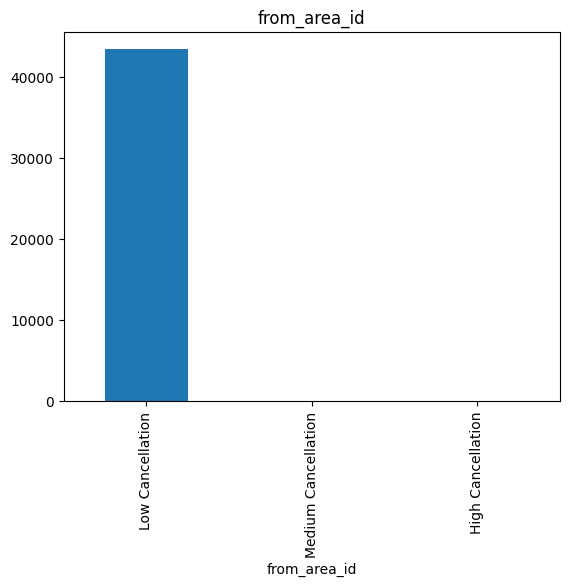

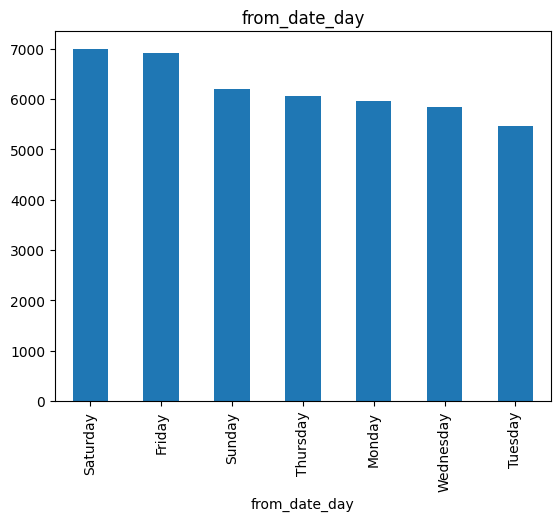

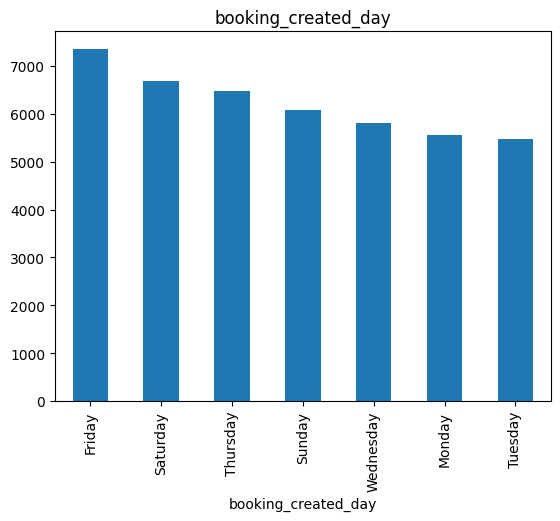

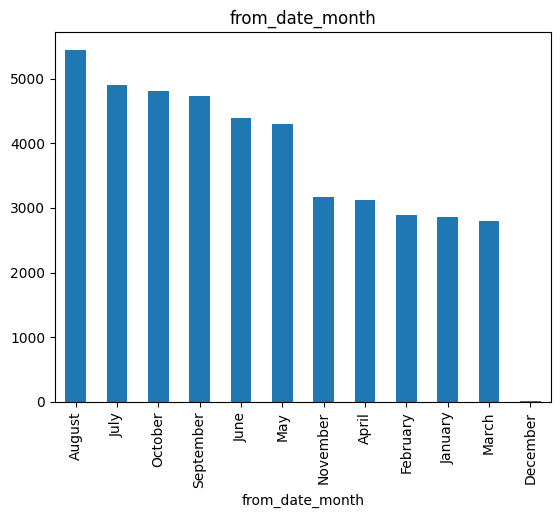

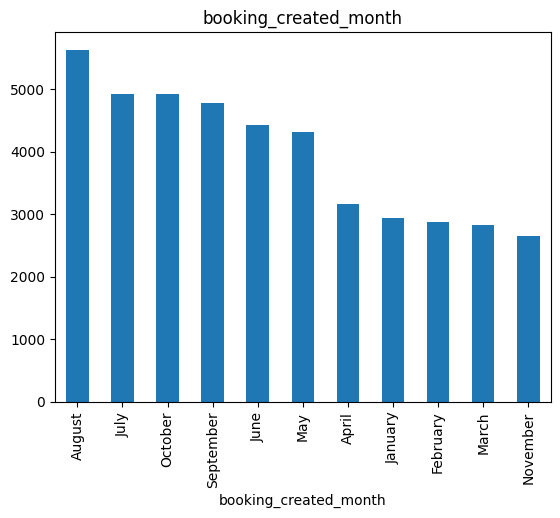

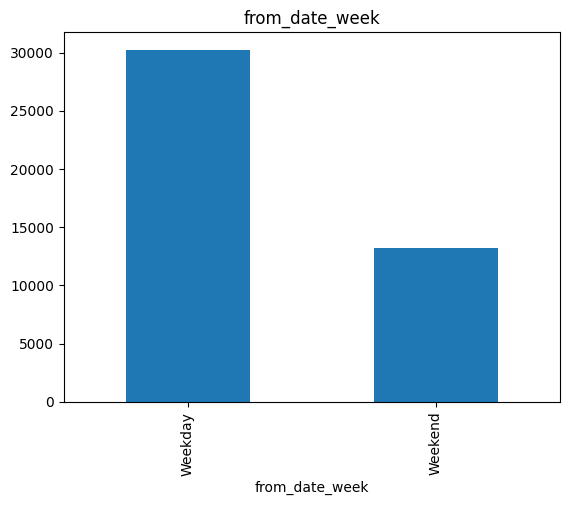

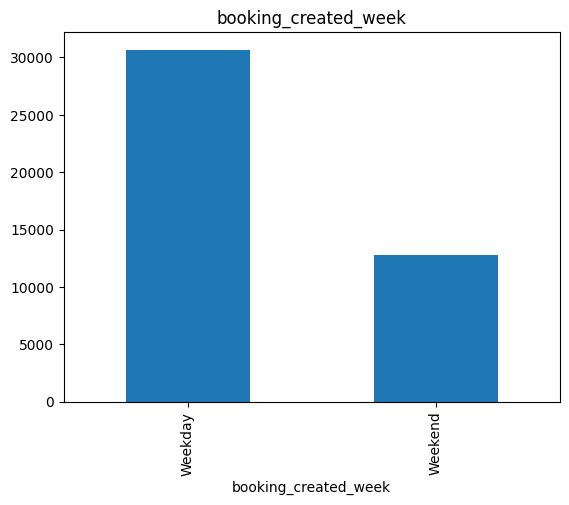

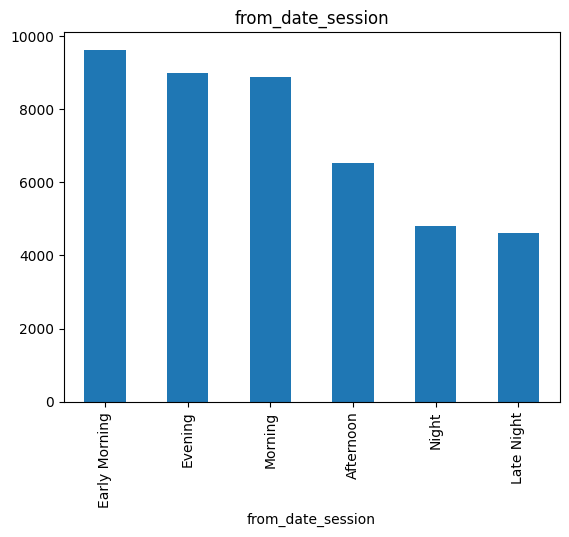

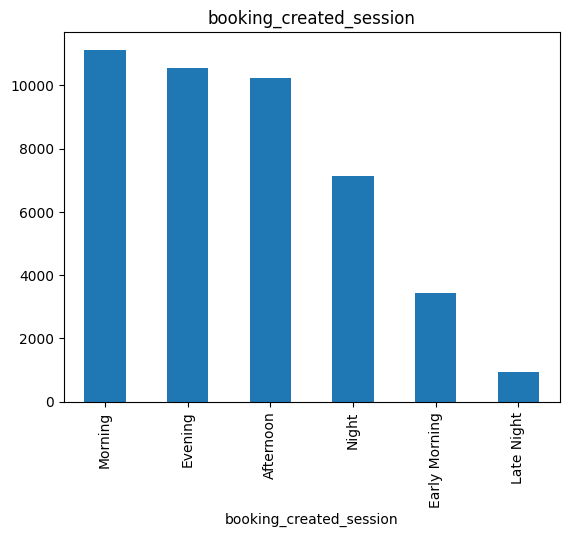

In [53]:
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

## Dividing data into Numerical and Categorical dataframes

In [54]:
num = data.select_dtypes(include='number')
char = data.select_dtypes(include='object')

In [55]:
num.head()

,online_booking,mobile_site_booking,distance,time_diff
0,0,0,3.980687,0 days 00:21:00
1,0,0,14.004432,0 days 06:35:00
2,0,0,12.648909,0 days 00:22:00
3,0,0,9.534596,0 days 01:06:00
4,0,0,14.655467,0 days 01:07:00


In [56]:
char.head()

,from_area_id,from_date_day,booking_created_day,from_date_month,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
1,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Late Night
2,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Late Night,Late Night
3,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Early Morning,Late Night
4,Low Cancellation,Tuesday,Tuesday,January,January,Weekday,Weekday,Morning,Early Morning


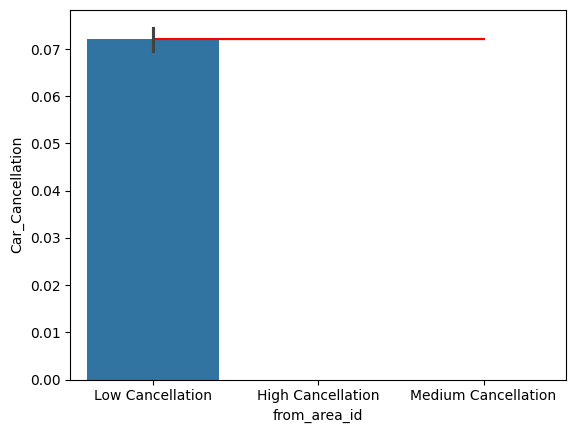

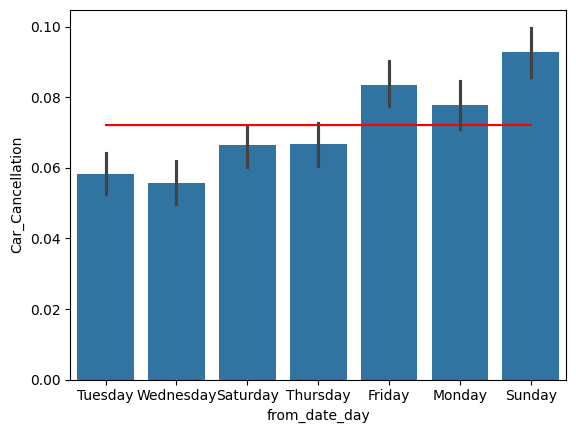

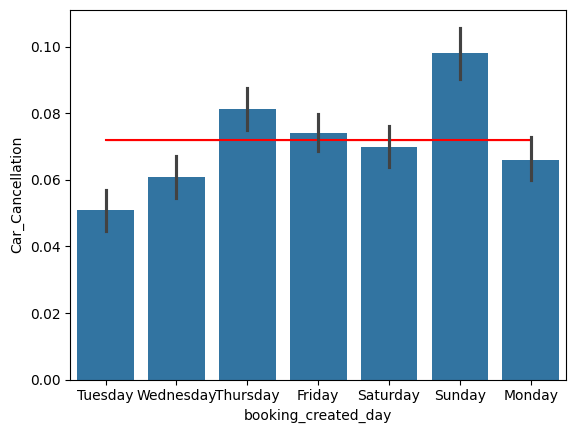

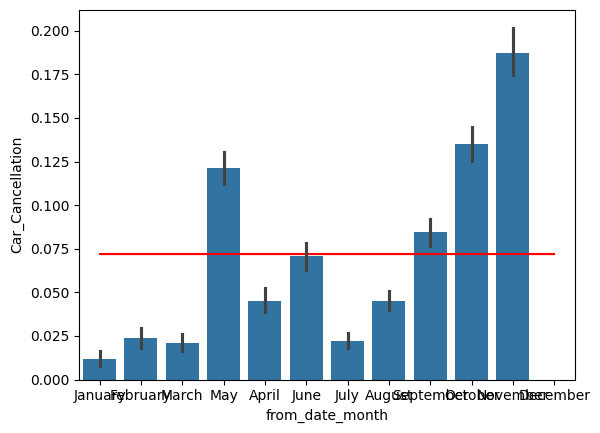

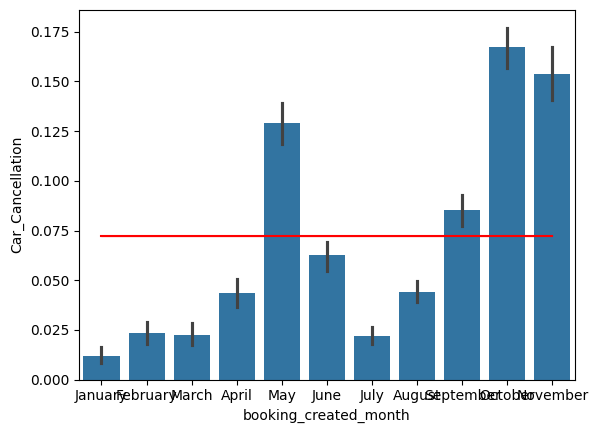

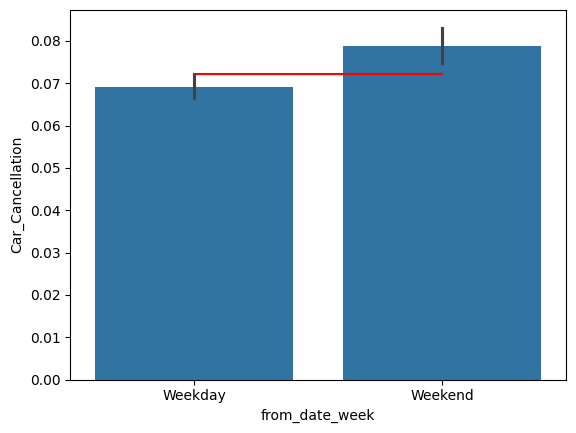

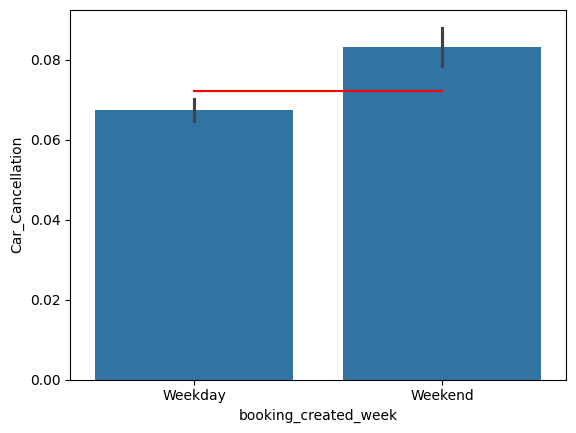

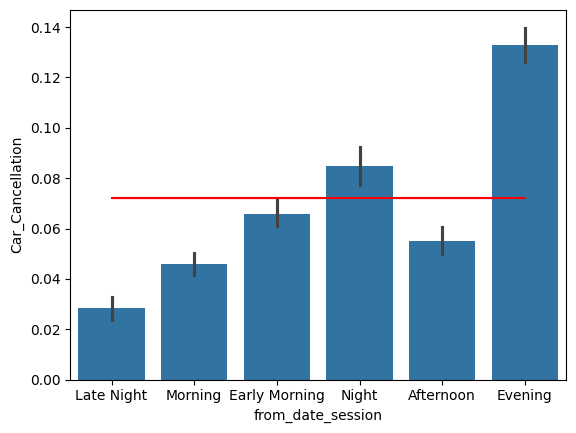

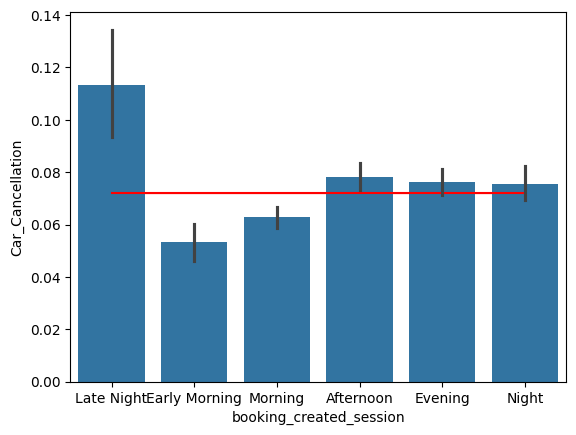

In [57]:
X_char_merged = pd.concat([char,target],axis=1,join='inner')

from numpy import mean
for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col, y=X_char_merged['Car_Cancellation'].mean(), data=X_char_merged,estimator=mean, color='red')
    sns.barplot(x=col, y='Car_Cancellation', data=X_char_merged,estimator=mean)
plt.show()